# Mini Project: Medical Insurance Cost Prediction

## Objective:

### Can you accurately predict medical insurance costs based on patient data? In this project, you’ll build various regression models and compare their performance to recommend the best one to the stakeholders.

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import root_mean_squared_error,r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import pickle


In [2]:
df = pd.read_excel('Medical Insurance cost prediction.xlsm')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe(include=np.number)

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.describe(exclude=np.number)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


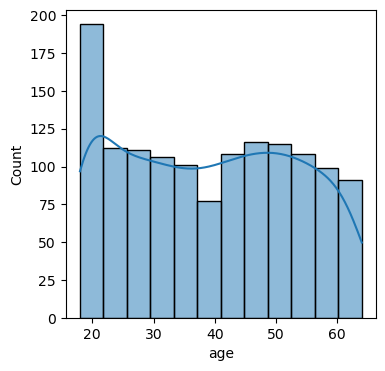

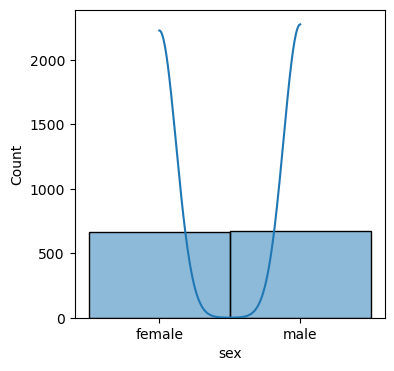

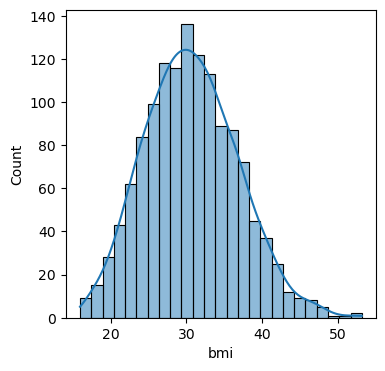

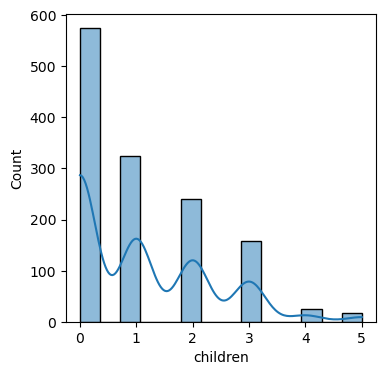

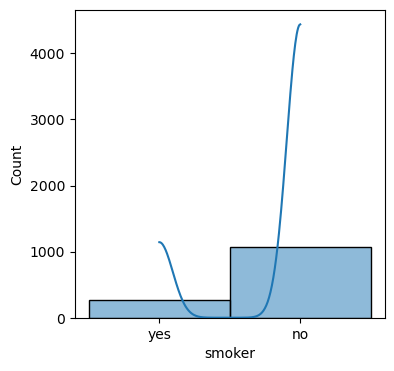

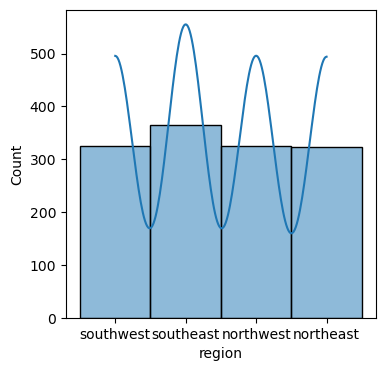

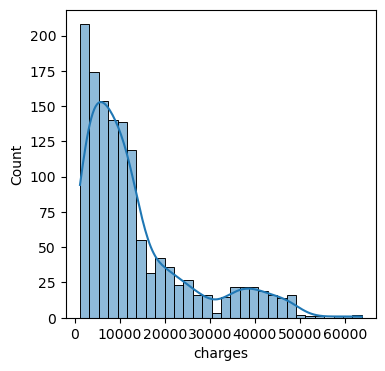

In [8]:

for col in df.columns.tolist():
    plt.figure(figsize=(4,4))
    sns.histplot(df[col],fill=True,cbar=True,kde=True)
    plt.show()

In [9]:
df.select_dtypes(exclude=np.number).columns.tolist()

['sex', 'smoker', 'region']

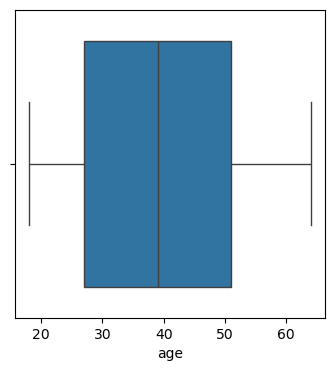

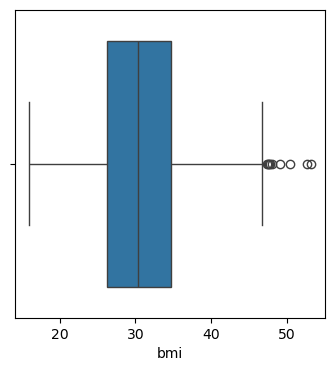

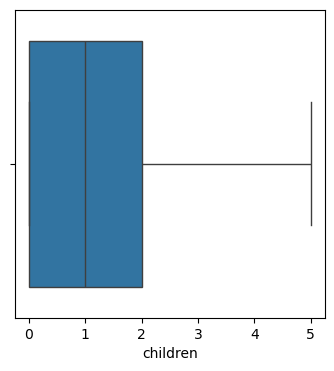

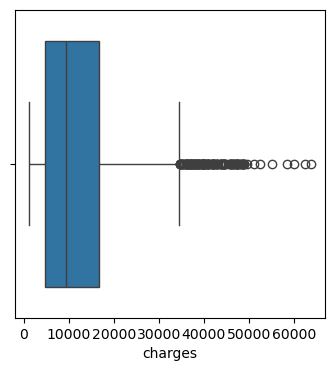

In [10]:

for col in df.select_dtypes(include=np.number).columns.tolist():
    plt.figure(figsize=(4,4))
    sns.boxplot(df[col],fill=True,orient='h')
    plt.show()

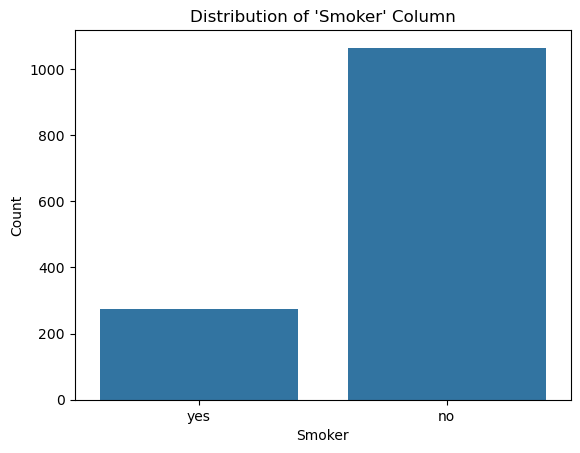

In [11]:
sns.countplot(x=df['smoker'])
plt.title("Distribution of 'Smoker' Column")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.show()


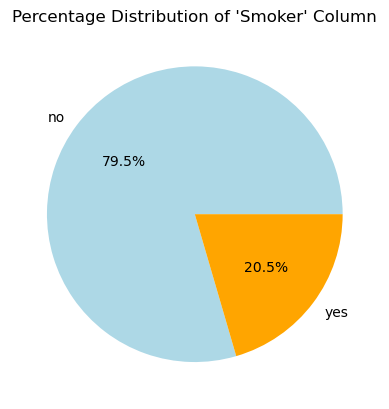

In [12]:
df['smoker'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title("Percentage Distribution of 'Smoker' Column")
plt.ylabel("")  
plt.show()


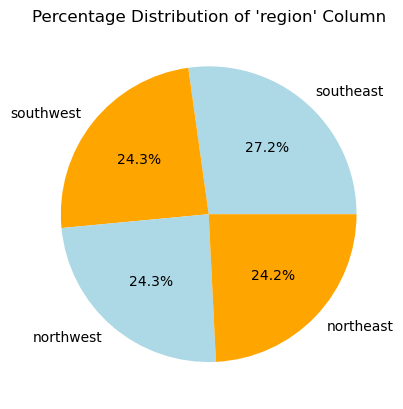

In [13]:
df['region'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title("Percentage Distribution of 'region' Column")
plt.ylabel("")  
plt.show()


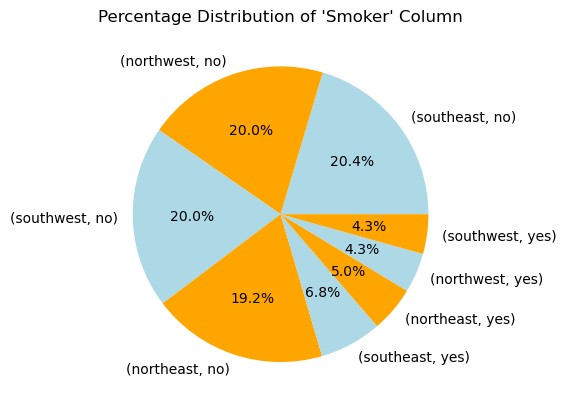

In [14]:
df[['region', 'smoker']].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'orange'])
plt.title("Percentage Distribution of 'Smoker' Column")
plt.ylabel("")  
plt.show()


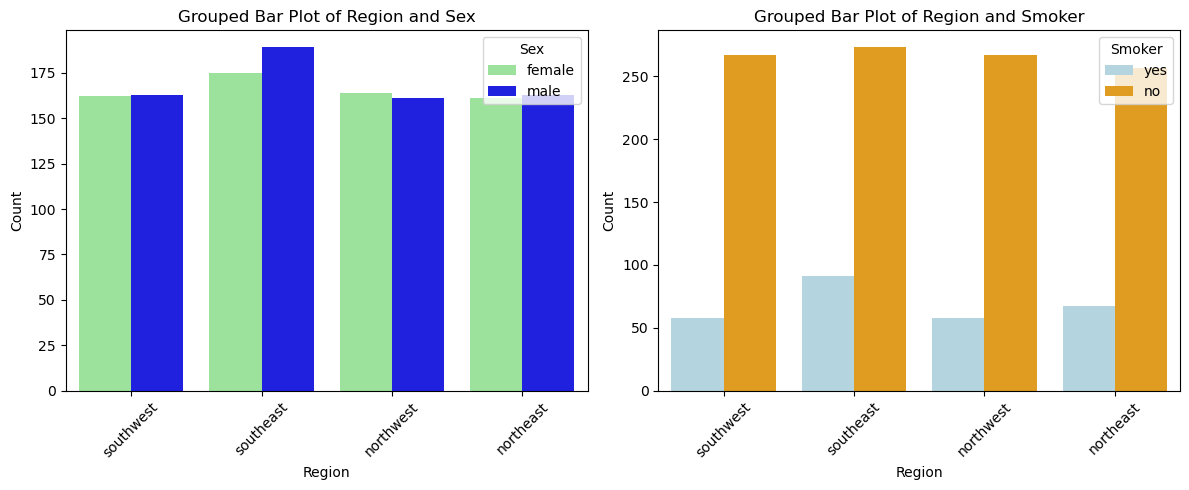

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# First grouped bar plot: Region vs Sex
sns.countplot(data=df, x='region', hue='sex', palette=['lightgreen', 'blue'], ax=axes[0])
axes[0].set_title("Grouped Bar Plot of Region and Sex")
axes[0].set_xlabel("Region")
axes[0].set_ylabel("Count")
axes[0].legend(title="Sex")
axes[0].tick_params(axis='x', rotation=45)

# Second grouped bar plot: Region vs Smoker
sns.countplot(data=df, x='region', hue='smoker', palette=['lightblue', 'orange'], ax=axes[1])
axes[1].set_title("Grouped Bar Plot of Region and Smoker")
axes[1].set_xlabel("Region")
axes[1].set_ylabel("Count")
axes[1].legend(title="Smoker")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_9788\1716789635.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='region', y='age', palette='coolwarm')


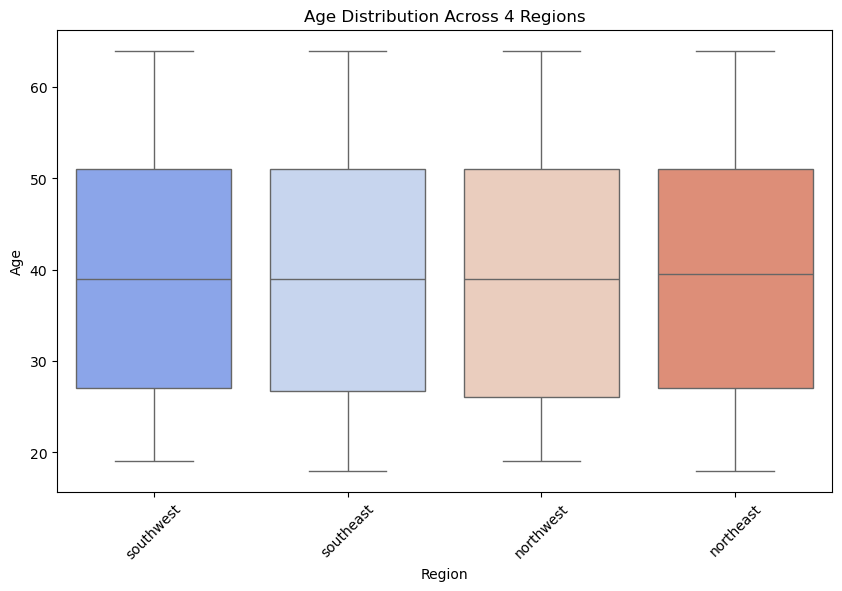

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='region', y='age', palette='coolwarm')

plt.title("Age Distribution Across 4 Regions")
plt.xlabel("Region")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()


### label encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['sex', 'smoker', 'region']:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])


for col, encoder in label_encoders.items():
    mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
    print(f"Mapping for {col}: {mapping}")


Mapping for sex: {'female': 0, 'male': 1}
Mapping for smoker: {'no': 0, 'yes': 1}
Mapping for region: {'northeast': 0, 'northwest': 1, 'southeast': 2, 'southwest': 3}


In [18]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


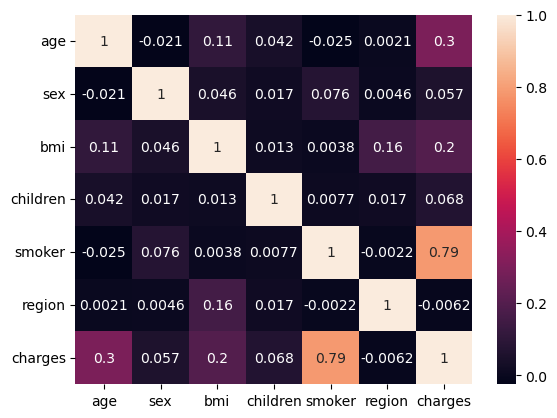

In [19]:
sns.heatmap(df.corr(),annot=True,fmt='.2g',cbar=True)
plt.show()

### 3. Missing Values & Outlier Treatment

· Check for missing values and treat them if any

· Check if there are any outliers.

In [20]:
for i in df.columns.tolist():
    print(i," : ",df[i].isna().sum())
    

age  :  0
sex  :  0
bmi  :  0
children  :  0
smoker  :  0
region  :  0
charges  :  0


In [21]:
df.shape

(1338, 7)

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(1337, 7)

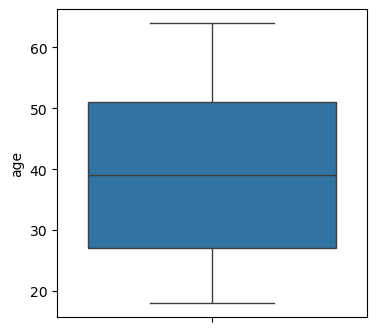

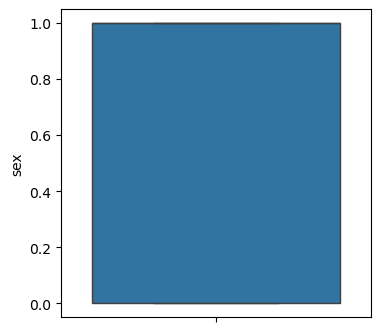

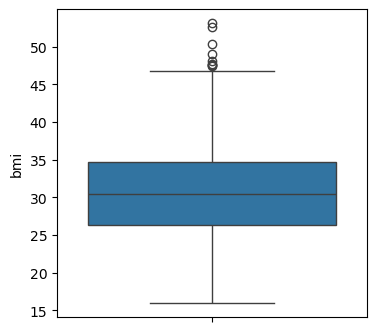

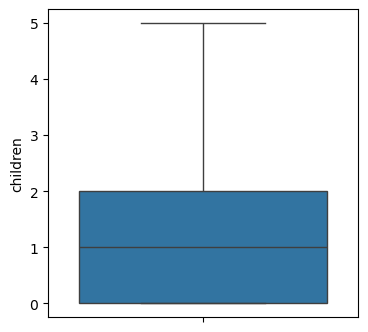

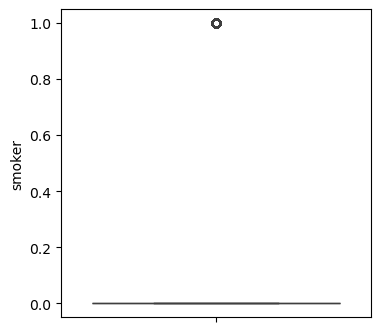

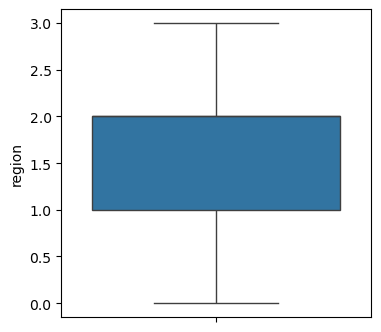

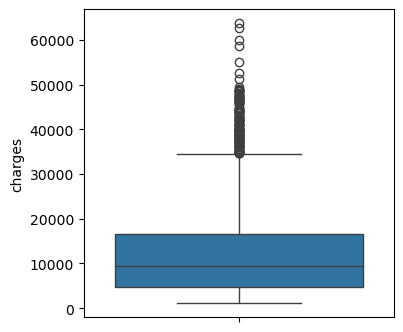

In [24]:
for col in df.columns.tolist():
    plt.figure(figsize=(4,4))
    sns.boxplot(df[col],fill=True,orient='v')
    plt.show()

## BMI , SMOKER , and Charges are having outlier.
 Here all outlier can not be removed beacuse it is meaningful data points to calculate charges. Hence will keep all the outlier but treating with log-transformatiom.

4. Feature Engineering & Preprocessing

· Encode categorical variables (sex, smoker, region)

· Feature scaling for numerical values (StandardScaler / MinMaxScaler)

· Check for skewness and treat it if required.

**applying label encoder above**

In [25]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

## log transformation to reduce extreme values.

In [26]:
df['bmi'] = np.log(df['bmi']) + 1

<Axes: ylabel='bmi'>

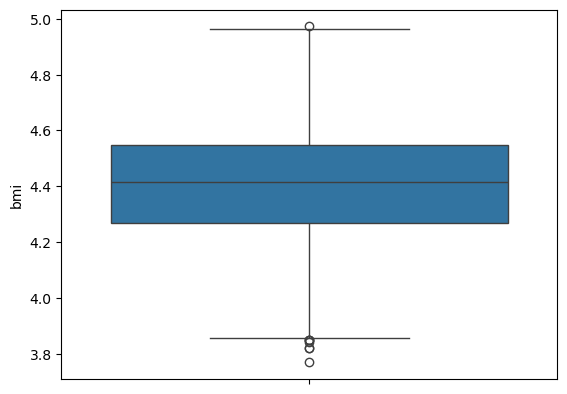

In [27]:
sns.boxplot(df['bmi'],fill=True,orient='v')

In [28]:
X = df.drop(columns=['charges'])
y = df['charges']

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,train_size=0.75,random_state=43)

In [31]:
modelName = []
training_scores_r2 = []
testing_scores_r2 = []
training_scores_adj_r2 = []
testing_scores_adj_r2 = []
training_scores_rmse = []
testing_scores_rmse = []
training_scores_mse = []
testing_scores_mse = []
training_scores_mae = []
testing_scores_mae = []
model_fit_status = []

def evaluate_model(y_train, y_test, y_train_pred, y_test_pred, X_train,model_name):
    """Evaluates the model using various metrics and stores results in a DataFrame for comparison."""
    
    # Compute Adjusted R²
    def adjusted_r2(y_true, y_pred, X):
        r2 = r2_score(y_true, y_pred)
        n = len(y_true)
        p = X.shape[1]
        return 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    adj_r2_train = adjusted_r2(y_train, y_train_pred, X_train)
    adj_r2_test = adjusted_r2(y_test, y_test_pred, X_test)
    
    rmse_train = root_mean_squared_error(y_train, y_train_pred)
    rmse_test = root_mean_squared_error(y_test, y_test_pred)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    

    # Detect Overfitting or Underfitting
    def detect_overfitting(rmse_train, rmse_test):
    
        overfit_ratio = rmse_train / rmse_test
        model_status = "Balanced"
        if overfit_ratio < 0.85:
            model_status = "Overfitting"
        elif overfit_ratio > 1.15:
            model_status = "Underfitting"

        return round(overfit_ratio, 4), model_status

    overfit_ratio, model_status = detect_overfitting(rmse_train, rmse_test)
    #print(f"Overfitting Ratio: {overfit_ratio}")
    #print(f"Model Fit Status: {model_fit_status}")
    model_fit_status.append(model_status)

    modelName.append(model_name)

    training_scores_r2.append(r2_train)
    testing_scores_r2.append(r2_test)
    
    training_scores_adj_r2.append(adj_r2_train)
    testing_scores_adj_r2.append(adj_r2_test)

    
    training_scores_rmse.append(rmse_train)
    testing_scores_rmse.append(rmse_test)
    
    training_scores_mse.append(mse_train)
    testing_scores_mse.append(mse_test)

    training_scores_mae.append(mae_train)
    testing_scores_mae.append(mae_test)

    
   




In [32]:
def create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                training_scores_adj_r2, testing_scores_adj_r2, 
                                training_scores_rmse, testing_scores_rmse, 
                                training_scores_mse, testing_scores_mse, 
                                training_scores_mae, testing_scores_mae, 
                                model_fit_status):
    
    df_results = pd.DataFrame({
        "Model Name": modelName,
        "Training Score R²": training_scores_r2,
        "Testing Score R²": testing_scores_r2,
        "Training Score Adjusted R²": training_scores_adj_r2,
        "Testing Score Adjusted R²": testing_scores_adj_r2,
        "Training Score RMSE": training_scores_rmse,
        "Testing Score RMSE": testing_scores_rmse,
        "Training Score MSE": training_scores_mse,
        "Testing Score MSE": testing_scores_mse,
        "Training Score MAE": training_scores_mae,
        "Testing Score MAE": testing_scores_mae,
        "Model Fit Status": model_fit_status
    })
    
    
    print(df_results.to_markdown(index=False))
    
    return df_results




### Linear Regression

In [33]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [34]:
predict_y_train = lr.predict(X_train)
predict_y_test = lr.predict(X_test)

In [35]:
evaluate_model(y_train, y_test, predict_y_train, predict_y_test, X_train,"LinearRegression")

In [36]:
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

| Model Name       |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:-----------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |               6003.35 |              6154.36 |          3.60402e+07 |         3.78762e+07 |              4186.55 |             4286.28 | Balanced           |


In [37]:
df_results

,Model Name,Training Score R²,Testing Score R²,Training Score Adjusted R²,Testing Score Adjusted R²,Training Score RMSE,Testing Score RMSE,Training Score MSE,Testing Score MSE,Training Score MAE,Testing Score MAE,Model Fit Status
0,LinearRegression,0.752272,0.746869,0.750778,0.742239,6003.350687,6154.363749,3.604022e+07,3.787619e+07,4186.54532,4286.275487,Balanced


In [38]:
rasso = Lasso()
rasso.fit(X_train,y_train)

Lasso()

In [39]:
predict_y_train_rasso = rasso.predict(X_train)
predict_y_test_rasso = rasso.predict(X_test)

In [40]:
evaluate_model(y_train, y_test, predict_y_train_rasso, predict_y_test_rasso, X_train,"LinearRegression - Rasso")

In [41]:
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

| Model Name               |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:-------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression         |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |               6003.35 |              6154.36 |          3.60402e+07 |         3.78762e+07 |              4186.55 |             4286.28 | Balanced           |
| LinearRegression - Rasso |            0.752271 |           0.746877 |                     0.750778 |                    0.742

,Model Name,Training Score R²,Testing Score R²,Training Score Adjusted R²,Testing Score Adjusted R²,Training Score RMSE,Testing Score RMSE,Training Score MSE,Testing Score MSE,Training Score MAE,Testing Score MAE,Model Fit Status
0,LinearRegression,0.752272,0.746869,0.750778,0.742239,6003.350687,6154.363749,3.604022e+07,3.787619e+07,4186.545320,4286.275487,Balanced
1,LinearRegression - Rasso,0.752271,0.746877,0.750778,0.742247,6003.351232,6154.264735,3.604023e+07,3.787497e+07,4186.402134,4285.997047,Balanced


In [42]:
ridge = Ridge()
ridge.fit(X_train,y_train)

Ridge()

In [43]:
predict_y_train_ridge = ridge.predict(X_train)
predict_y_test_ridge = ridge.predict(X_test)

In [44]:
evaluate_model(y_train, y_test, predict_y_train_ridge, predict_y_test_ridge, X_train,"LinearRegression - Ridge")
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

| Model Name               |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:-------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression         |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |               6003.35 |              6154.36 |          3.60402e+07 |         3.78762e+07 |              4186.55 |             4286.28 | Balanced           |
| LinearRegression - Rasso |            0.752271 |           0.746877 |                     0.750778 |                    0.742

,Model Name,Training Score R²,Testing Score R²,Training Score Adjusted R²,Testing Score Adjusted R²,Training Score RMSE,Testing Score RMSE,Training Score MSE,Testing Score MSE,Training Score MAE,Testing Score MAE,Model Fit Status
0,LinearRegression,0.752272,0.746869,0.750778,0.742239,6003.350687,6154.363749,3.604022e+07,3.787619e+07,4186.545320,4286.275487,Balanced
1,LinearRegression - Rasso,0.752271,0.746877,0.750778,0.742247,6003.351232,6154.264735,3.604023e+07,3.787497e+07,4186.402134,4285.997047,Balanced
2,LinearRegression - Ridge,0.752271,0.746901,0.750777,0.742271,6003.360091,6153.979919,3.604033e+07,3.787147e+07,4187.661797,4287.199497,Balanced


### Decision Tree Regressor

In [45]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [46]:
predict_y_train_dt = dt.predict(X_train)
predict_y_test_dt = dt.predict(X_test)

In [47]:
evaluate_model(y_train, y_test, predict_y_train_dt, predict_y_test_dt, X_train,"DecisionTreeRegreesor")
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

| Model Name               |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:-------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression         |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |              6003.35  |              6154.36 |          3.60402e+07 |         3.78762e+07 |            4186.55   |             4286.28 | Balanced           |
| LinearRegression - Rasso |            0.752271 |           0.746877 |                     0.750778 |                    0.742

,Model Name,Training Score R²,Testing Score R²,Training Score Adjusted R²,Testing Score Adjusted R²,Training Score RMSE,Testing Score RMSE,Training Score MSE,Testing Score MSE,Training Score MAE,Testing Score MAE,Model Fit Status
0,LinearRegression,0.752272,0.746869,0.750778,0.742239,6003.350687,6154.363749,3.604022e+07,3.787619e+07,4186.545320,4286.275487,Balanced
1,LinearRegression - Rasso,0.752271,0.746877,0.750778,0.742247,6003.351232,6154.264735,3.604023e+07,3.787497e+07,4186.402134,4285.997047,Balanced
2,LinearRegression - Ridge,0.752271,0.746901,0.750777,0.742271,6003.360091,6153.979919,3.604033e+07,3.787147e+07,4187.661797,4287.199497,Balanced
3,DecisionTreeRegreesor,0.998743,0.703114,0.998736,0.697683,427.586780,6665.078883,1.828305e+05,4.442328e+07,19.103169,3200.714000,Overfitting


### Random Forest Regressor

In [48]:
rf = RandomForestRegressor()

In [49]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [50]:
predict_y_train_rf = rf.predict(X_train)
predict_y_test_rf = rf.predict(X_test)

In [51]:
evaluate_model(y_train, y_test, predict_y_train_rf, predict_y_test_rf, X_train,"RandomForestRegressor")
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

| Model Name               |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:-------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression         |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |              6003.35  |              6154.36 |          3.60402e+07 |         3.78762e+07 |            4186.55   |             4286.28 | Balanced           |
| LinearRegression - Rasso |            0.752271 |           0.746877 |                     0.750778 |                    0.742

,Model Name,Training Score R²,Testing Score R²,Training Score Adjusted R²,Testing Score Adjusted R²,Training Score RMSE,Testing Score RMSE,Training Score MSE,Testing Score MSE,Training Score MAE,Testing Score MAE,Model Fit Status
0,LinearRegression,0.752272,0.746869,0.750778,0.742239,6003.350687,6154.363749,3.604022e+07,3.787619e+07,4186.545320,4286.275487,Balanced
1,LinearRegression - Rasso,0.752271,0.746877,0.750778,0.742247,6003.351232,6154.264735,3.604023e+07,3.787497e+07,4186.402134,4285.997047,Balanced
2,LinearRegression - Ridge,0.752271,0.746901,0.750777,0.742271,6003.360091,6153.979919,3.604033e+07,3.787147e+07,4187.661797,4287.199497,Balanced
3,DecisionTreeRegreesor,0.998743,0.703114,0.998736,0.697683,427.586780,6665.078883,1.828305e+05,4.442328e+07,19.103169,3200.714000,Overfitting
4,RandomForestRegressor,0.976925,0.818125,0.976786,0.814798,1832.203880,5216.713762,3.356971e+06,2.721410e+07,973.574182,2924.404440,Overfitting


### SVR

In [52]:
svr = SVR()
svr.fit(X_train,y_train)

SVR()

In [53]:
predict_y_train_svr = svr.predict(X_train)
predict_y_test_svr = svr.predict(X_test)

In [54]:
evaluate_model(y_train, y_test, predict_y_train_svr, predict_y_test_svr, X_train,"SVR")
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

| Model Name               |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:-------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression         |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |              6003.35  |              6154.36 |          3.60402e+07 |         3.78762e+07 |            4186.55   |             4286.28 | Balanced           |
| LinearRegression - Rasso |            0.752271 |           0.746877 |                     0.750778 |                    0.742

,Model Name,Training Score R²,Testing Score R²,Training Score Adjusted R²,Testing Score Adjusted R²,Training Score RMSE,Testing Score RMSE,Training Score MSE,Testing Score MSE,Training Score MAE,Testing Score MAE,Model Fit Status
0,LinearRegression,0.752272,0.746869,0.750778,0.742239,6003.350687,6154.363749,3.604022e+07,3.787619e+07,4186.545320,4286.275487,Balanced
1,LinearRegression - Rasso,0.752271,0.746877,0.750778,0.742247,6003.351232,6154.264735,3.604023e+07,3.787497e+07,4186.402134,4285.997047,Balanced
2,LinearRegression - Ridge,0.752271,0.746901,0.750777,0.742271,6003.360091,6153.979919,3.604033e+07,3.787147e+07,4187.661797,4287.199497,Balanced
3,DecisionTreeRegreesor,0.998743,0.703114,0.998736,0.697683,427.586780,6665.078883,1.828305e+05,4.442328e+07,19.103169,3200.714000,Overfitting
4,RandomForestRegressor,0.976925,0.818125,0.976786,0.814798,1832.203880,5216.713762,3.356971e+06,2.721410e+07,973.574182,2924.404440,Overfitting
5,SVR,-0.110706,-0.130256,-0.117404,-0.150931,12711.749034,13004.655889,1.615886e+08,1.691211e+08,8228.622949,8585.288142,Balanced


### KNN

In [55]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [56]:
predict_y_train_knn = knn.predict(X_train)
predict_y_test_knn = knn.predict(X_test)

In [57]:
evaluate_model(y_train, y_test, predict_y_train_knn, predict_y_test_knn, X_train,"knn")
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

| Model Name               |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:-------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression         |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |              6003.35  |              6154.36 |          3.60402e+07 |         3.78762e+07 |            4186.55   |             4286.28 | Balanced           |
| LinearRegression - Rasso |            0.752271 |           0.746877 |                     0.750778 |                    0.742

,Model Name,Training Score R²,Testing Score R²,Training Score Adjusted R²,Testing Score Adjusted R²,Training Score RMSE,Testing Score RMSE,Training Score MSE,Testing Score MSE,Training Score MAE,Testing Score MAE,Model Fit Status
0,LinearRegression,0.752272,0.746869,0.750778,0.742239,6003.350687,6154.363749,3.604022e+07,3.787619e+07,4186.545320,4286.275487,Balanced
1,LinearRegression - Rasso,0.752271,0.746877,0.750778,0.742247,6003.351232,6154.264735,3.604023e+07,3.787497e+07,4186.402134,4285.997047,Balanced
2,LinearRegression - Ridge,0.752271,0.746901,0.750777,0.742271,6003.360091,6153.979919,3.604033e+07,3.787147e+07,4187.661797,4287.199497,Balanced
3,DecisionTreeRegreesor,0.998743,0.703114,0.998736,0.697683,427.586780,6665.078883,1.828305e+05,4.442328e+07,19.103169,3200.714000,Overfitting
4,RandomForestRegressor,0.976925,0.818125,0.976786,0.814798,1832.203880,5216.713762,3.356971e+06,2.721410e+07,973.574182,2924.404440,Overfitting
5,SVR,-0.110706,-0.130256,-0.117404,-0.150931,12711.749034,13004.655889,1.615886e+08,1.691211e+08,8228.622949,8585.288142,Balanced
6,knn,0.874159,0.787273,0.873400,0.783381,4278.750428,5641.858400,1.830771e+07,3.183057e+07,2493.896290,3495.310477,Overfitting


### Ensemble Learning methods

AdaBoostRegressor
RandomForestRegressor (applied ABove)

In [58]:
abr = AdaBoostRegressor()
abr.fit(X_train,y_train)

AdaBoostRegressor()

In [59]:
predict_y_train_abr = abr.predict(X_train)
predict_y_test_abr = abr.predict(X_test)

In [60]:
evaluate_model(y_train, y_test, predict_y_train_abr, predict_y_test_abr, X_train,"AdaBoostRegressor")
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

| Model Name               |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:-------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression         |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |              6003.35  |              6154.36 |          3.60402e+07 |         3.78762e+07 |            4186.55   |             4286.28 | Balanced           |
| LinearRegression - Rasso |            0.752271 |           0.746877 |                     0.750778 |                    0.742

,Model Name,Training Score R²,Testing Score R²,Training Score Adjusted R²,Testing Score Adjusted R²,Training Score RMSE,Testing Score RMSE,Training Score MSE,Testing Score MSE,Training Score MAE,Testing Score MAE,Model Fit Status
0,LinearRegression,0.752272,0.746869,0.750778,0.742239,6003.350687,6154.363749,3.604022e+07,3.787619e+07,4186.545320,4286.275487,Balanced
1,LinearRegression - Rasso,0.752271,0.746877,0.750778,0.742247,6003.351232,6154.264735,3.604023e+07,3.787497e+07,4186.402134,4285.997047,Balanced
2,LinearRegression - Ridge,0.752271,0.746901,0.750777,0.742271,6003.360091,6153.979919,3.604033e+07,3.787147e+07,4187.661797,4287.199497,Balanced
3,DecisionTreeRegreesor,0.998743,0.703114,0.998736,0.697683,427.586780,6665.078883,1.828305e+05,4.442328e+07,19.103169,3200.714000,Overfitting
4,RandomForestRegressor,0.976925,0.818125,0.976786,0.814798,1832.203880,5216.713762,3.356971e+06,2.721410e+07,973.574182,2924.404440,Overfitting
5,SVR,-0.110706,-0.130256,-0.117404,-0.150931,12711.749034,13004.655889,1.615886e+08,1.691211e+08,8228.622949,8585.288142,Balanced
6,knn,0.874159,0.787273,0.873400,0.783381,4278.750428,5641.858400,1.830771e+07,3.183057e+07,2493.896290,3495.310477,Overfitting
7,AdaBoostRegressor,0.824753,0.808842,0.823696,0.805345,5049.298477,5348.188228,2.549542e+07,2.860312e+07,4116.894624,4348.815202,Balanced


In [61]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [62]:
predict_y_train_gbr = gbr.predict(X_train)
predict_y_test_gbr = gbr.predict(X_test)

In [63]:
evaluate_model(y_train, y_test, predict_y_train_gbr, predict_y_test_gbr, X_train,"GradientBoostingRegressor")
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

| Model Name                |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:--------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression          |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |              6003.35  |              6154.36 |          3.60402e+07 |         3.78762e+07 |            4186.55   |             4286.28 | Balanced           |
| LinearRegression - Rasso  |            0.752271 |           0.746877 |                     0.750778 |                    0

,Model Name,Training Score R²,Testing Score R²,Training Score Adjusted R²,Testing Score Adjusted R²,Training Score RMSE,Testing Score RMSE,Training Score MSE,Testing Score MSE,Training Score MAE,Testing Score MAE,Model Fit Status
0,LinearRegression,0.752272,0.746869,0.750778,0.742239,6003.350687,6154.363749,3.604022e+07,3.787619e+07,4186.545320,4286.275487,Balanced
1,LinearRegression - Rasso,0.752271,0.746877,0.750778,0.742247,6003.351232,6154.264735,3.604023e+07,3.787497e+07,4186.402134,4285.997047,Balanced
2,LinearRegression - Ridge,0.752271,0.746901,0.750777,0.742271,6003.360091,6153.979919,3.604033e+07,3.787147e+07,4187.661797,4287.199497,Balanced
3,DecisionTreeRegreesor,0.998743,0.703114,0.998736,0.697683,427.586780,6665.078883,1.828305e+05,4.442328e+07,19.103169,3200.714000,Overfitting
4,RandomForestRegressor,0.976925,0.818125,0.976786,0.814798,1832.203880,5216.713762,3.356971e+06,2.721410e+07,973.574182,2924.404440,Overfitting
5,SVR,-0.110706,-0.130256,-0.117404,-0.150931,12711.749034,13004.655889,1.615886e+08,1.691211e+08,8228.622949,8585.288142,Balanced
6,knn,0.874159,0.787273,0.873400,0.783381,4278.750428,5641.858400,1.830771e+07,3.183057e+07,2493.896290,3495.310477,Overfitting
7,AdaBoostRegressor,0.824753,0.808842,0.823696,0.805345,5049.298477,5348.188228,2.549542e+07,2.860312e+07,4116.894624,4348.815202,Balanced
8,GradientBoostingRegressor,0.909488,0.844456,0.908942,0.841611,3628.766445,4824.325934,1.316795e+07,2.327412e+07,1923.637679,2662.200287,Overfitting


In [73]:
xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [75]:
predict_y_train_xgb = xg.predict(X_train)
predict_y_test_xgb = xg.predict(X_test)

In [76]:
evaluate_model(y_train, y_test, predict_y_train_xgb, predict_y_test_xgb, X_train,"XGBRegressor")
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

| Model Name                |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:--------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression          |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |              6003.35  |              6154.36 |          3.60402e+07 |         3.78762e+07 |            4186.55   |             4286.28 | Balanced           |
| LinearRegression - Rasso  |            0.752271 |           0.746877 |                     0.750778 |                    0

,Model Name,Training Score R²,Testing Score R²,Training Score Adjusted R²,Testing Score Adjusted R²,Training Score RMSE,Testing Score RMSE,Training Score MSE,Testing Score MSE,Training Score MAE,Testing Score MAE,Model Fit Status
0,LinearRegression,0.752272,0.746869,0.750778,0.742239,6003.350687,6154.363749,3.604022e+07,3.787619e+07,4186.545320,4286.275487,Balanced
1,LinearRegression - Rasso,0.752271,0.746877,0.750778,0.742247,6003.351232,6154.264735,3.604023e+07,3.787497e+07,4186.402134,4285.997047,Balanced
2,LinearRegression - Ridge,0.752271,0.746901,0.750777,0.742271,6003.360091,6153.979919,3.604033e+07,3.787147e+07,4187.661797,4287.199497,Balanced
3,DecisionTreeRegreesor,0.998743,0.703114,0.998736,0.697683,427.586780,6665.078883,1.828305e+05,4.442328e+07,19.103169,3200.714000,Overfitting
4,RandomForestRegressor,0.976925,0.818125,0.976786,0.814798,1832.203880,5216.713762,3.356971e+06,2.721410e+07,973.574182,2924.404440,Overfitting
5,SVR,-0.110706,-0.130256,-0.117404,-0.150931,12711.749034,13004.655889,1.615886e+08,1.691211e+08,8228.622949,8585.288142,Balanced
6,knn,0.874159,0.787273,0.873400,0.783381,4278.750428,5641.858400,1.830771e+07,3.183057e+07,2493.896290,3495.310477,Overfitting
7,AdaBoostRegressor,0.824753,0.808842,0.823696,0.805345,5049.298477,5348.188228,2.549542e+07,2.860312e+07,4116.894624,4348.815202,Balanced
8,GradientBoostingRegressor,0.909488,0.844456,0.908942,0.841611,3628.766445,4824.325934,1.316795e+07,2.327412e+07,1923.637679,2662.200287,Overfitting
9,XGBRegressor,0.996864,0.776343,0.996845,0.772252,675.456102,5784.981320,4.562409e+05,3.346601e+07,341.364594,3447.355963,Overfitting


## 7. Hyperparameter Tuning

· Use GridSearchCV or RandomizedSearchCV to optimize the best-performing models

· Document best parameters and improvement in performance

In [77]:
#Ridge Regression - Hyperparameter

In [78]:
param_grid = {
    'alpha': np.logspace(-3, 3, 7)  # Test values from 0.001 to 1000
}

# Apply GridSearchCV
ridge = Ridge()
grid_search_ridge = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)
grid_search_ridge.fit(X_train, y_train)

predict_y_train_ridge = grid_search_ridge.predict(X_train)
predict_y_test_ridge = grid_search_ridge.predict(X_test)

evaluate_model(y_train, y_test, predict_y_train_ridge, predict_y_test_ridge, X_train,"Ridge - hyperparameter tuning")
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

# Get best parameters
print(f"Best alpha for Ridge Regression: {grid_search_ridge.best_params_['alpha']}")
print(f"Best R² score: {grid_search_ridge.best_score_:.4f}")

| Model Name                    |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:------------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression              |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |              6003.35  |              6154.36 |          3.60402e+07 |         3.78762e+07 |            4186.55   |             4286.28 | Balanced           |
| LinearRegression - Rasso      |            0.752271 |           0.746877 |                     0.750778 |     

In [79]:
#Lasso Regression - Hyperparameter

In [80]:
param_grid = {
    'alpha': np.logspace(-3, 3, 7)  # Test values from 0.001 to 1000
}

# Apply GridSearchCV
lasso = Lasso()
grid_search_lasso = GridSearchCV(lasso, param_grid, scoring='r2', cv=5)
grid_search_lasso.fit(X_train, y_train)

predict_y_train_lasso = grid_search_lasso.predict(X_train)
predict_y_test_lasso = grid_search_lasso.predict(X_test)

evaluate_model(y_train, y_test, predict_y_train_lasso, predict_y_test_lasso, X_train,"Lasso - Hyperparameter tuning")
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

# Get best parameters
print(f"Best alpha for Lasso Regression: {grid_search_lasso.best_params_['alpha']}")
print(f"Best R² score: {grid_search_lasso.best_score_:.4f}")

| Model Name                    |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:------------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression              |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |              6003.35  |              6154.36 |          3.60402e+07 |         3.78762e+07 |            4186.55   |             4286.28 | Balanced           |
| LinearRegression - Rasso      |            0.752271 |           0.746877 |                     0.750778 |     

In [81]:
# Decision Tree Hyperparameter

In [82]:
dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    "max_depth": [3, 5, 10, None],          # Controls tree depth to prevent overfitting
    "min_samples_split": [2, 5, 10, 20],    # Minimum samples required to split a node
    "min_samples_leaf": [1, 3, 5, 10],      # Minimum samples in each leaf node
    "criterion": ["squared_error"],  # Different loss functions for tree splits
    "splitter": ["best", "random"],         # Splitting strategy
    "ccp_alpha": [0.0, 0.01, 0.1],          # Complexity parameter for pruning
}

grid_search_dt = GridSearchCV(dt, param_grid, cv=5, scoring='r2')
grid_search_dt.fit(X_train, y_train)
predict_y_train_dt = grid_search_dt.predict(X_train)
predict_y_test_dt = grid_search_dt.predict(X_test)

evaluate_model(y_train, y_test, predict_y_train_dt, predict_y_test_dt, X_train,"DecisionTreeRegressor Hyperparameter")
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

print("Best Parameters:", grid_search_dt.best_params_)
print(f"Best R² score: {grid_search_dt.best_score_:.4f}")

| Model Name                           |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:-------------------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression                     |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |              6003.35  |              6154.36 |          3.60402e+07 |         3.78762e+07 |            4186.55   |             4286.28 | Balanced           |
| LinearRegression - Rasso             |            0.752271 |           0.746877 |        

In [83]:
# Random Forest Regressor HYperparameter

In [84]:
rf = RandomForestRegressor(random_state=42)


param_grid = {
    "n_estimators": [50, 100, 200],         # Number of trees in the forest
    "max_depth": [None, 10, 20],            # Limits tree depth (None = grow fully)
    "min_samples_split": [2, 5, 10],        # Minimum samples needed to split a node
    "min_samples_leaf": [1, 3, 5],          # Minimum samples per leaf
    "oob_score": [True],             # Whether to use Out-of-Bag samples for validation
    "criterion": ["squared_error"]  # Splitting criterion
}


# Apply GridSearchCV
grid_search_rf = GridSearchCV(rf, param_grid, cv=5, scoring="r2")
grid_search_rf.fit(X_train, y_train)

predict_y_train_rf = grid_search_rf.predict(X_train)
predict_y_test_rf = grid_search_rf.predict(X_test)

evaluate_model(y_train, y_test, predict_y_train_rf, predict_y_test_rf, X_train,"RandomForestRegressor - Hyperparameter")
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

# Print best parameters
print("Best Parameters:", grid_search_rf.best_params_)
print(f"Best R² score: {grid_search_rf.best_score_:.4f}")


| Model Name                             |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:---------------------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression                       |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |              6003.35  |              6154.36 |          3.60402e+07 |         3.78762e+07 |            4186.55   |             4286.28 | Balanced           |
| LinearRegression - Rasso               |            0.752271 |           0.746877 |

In [85]:
## SVR Hyperparameter 

In [86]:
svr = SVR()

param_grid = {
    "C": [0.1, 1, 10, 100],
    "kernel": ["linear", "poly"],
    "epsilon": [0.01, 0.1, 0.5, 1]
}

grid_search_svr = GridSearchCV(svr, param_grid, cv=5, scoring="r2")
grid_search_svr.fit(X_train, y_train)

predict_y_train_svr = grid_search_svr.predict(X_train)
predict_y_test_svr = grid_search_svr.predict(X_test)

evaluate_model(y_train, y_test, predict_y_train_svr, predict_y_test_svr, X_train,"SVR- Hyperparameter")
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

# Print best parameters
print("Best Parameters:", grid_search_svr.best_params_)
print(f"Best R² score: {grid_search_svr.best_score_:.4f}")


| Model Name                             |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:---------------------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression                       |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |              6003.35  |              6154.36 |          3.60402e+07 |         3.78762e+07 |            4186.55   |             4286.28 | Balanced           |
| LinearRegression - Rasso               |            0.752271 |           0.746877 |

In [87]:
## KNN Hyperparameter

In [88]:
knn = KNeighborsRegressor()

param_grid = {
    "n_neighbors": [3, 5, 10, 15],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan"],
    "p": [1, 2]  
}

grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring="r2")
grid_search_knn.fit(X_train, y_train)

predict_y_train_knn = grid_search_knn.predict(X_train)
predict_y_test_knn = grid_search_knn.predict(X_test)

evaluate_model(y_train, y_test, predict_y_train_knn, predict_y_test_knn, X_train,"KNN - Hyperparameter")
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

# Print best parameters
print("Best Parameters:", grid_search_knn.best_params_)
print(f"Best R² score: {grid_search_knn.best_score_:.4f}")


| Model Name                             |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:---------------------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression                       |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |              6003.35  |              6154.36 |          3.60402e+07 |         3.78762e+07 |            4186.55   |             4286.28 | Balanced           |
| LinearRegression - Rasso               |            0.752271 |           0.746877 |

In [89]:
## AdaBoostRegressor Hyperparameter tuning

In [90]:
weak_learner = DecisionTreeRegressor(max_depth=3)  # Set optimal weak learner here

# Define AdaBoost model
adaboost = AdaBoostRegressor(estimator=weak_learner, random_state=42)

# Expanded hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200, 500],  # Number of weak learners (trees)
    "learning_rate": [0.001, 0.01, 0.1, 1, 10],  # Controls weight of each learner
    "loss": ["linear", "square", "exponential"],  # Defines how errors are corrected
}

# Apply GridSearchCV with parallel processing
grid_search_ab = GridSearchCV(adaboost, param_grid, cv=5, scoring="r2")
grid_search_ab.fit(X_train, y_train)

# Predictions
predict_y_train_ab = grid_search_ab.predict(X_train)
predict_y_test_ab = grid_search_ab.predict(X_test)

# Evaluate performance
evaluate_model(y_train, y_test, predict_y_train_ab, predict_y_test_ab, X_train,"adaboost - Hyperparameter")
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

# Get best parameters
print(f"Best Parameters: {grid_search_ab.best_params_}")
print(f"Best R² score: {grid_search_ab.best_score_:.4f}")


| Model Name                             |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:---------------------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression                       |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |              6003.35  |              6154.36 |          3.60402e+07 |         3.78762e+07 |            4186.55   |             4286.28 | Balanced           |
| LinearRegression - Rasso               |            0.752271 |           0.746877 |

In [91]:
## GradientBoostingRegressor HYperparameter tuning

In [92]:
gb = GradientBoostingRegressor(random_state=42)


param_grid = {
    "n_estimators": [50, 100],      # Number of boosting stages
    "learning_rate": [0.001, 0.01, 0.1, 0.2, 0.5],  # Shrinks contribution of each tree
    "max_depth": [3, 5, 10],                  # Limits tree complexity
    "min_samples_split": [2, 5, 10],          # Minimum samples required for a split
    "min_samples_leaf": [1, 3, 5],            # Minimum samples required in a leaf node
    "loss": ["squared_error"],  # Loss functions
}


grid_search_gb = GridSearchCV(gb, param_grid, cv=5, scoring="r2")
grid_search_gb.fit(X_train, y_train)

predict_y_train_gb = grid_search_gb.predict(X_train)
predict_y_test_gb = grid_search_gb.predict(X_test)

evaluate_model(y_train, y_test, predict_y_train_gb, predict_y_test_gb, X_train,"GradientBoostingRegressor - Hyperparameter")
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

# Get best parameters
print("Best Parameters:", grid_search_gb.best_params_)
print(f"Best R² score: {grid_search_gb.best_score_:.4f}")


| Model Name                                 |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:-------------------------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression                           |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |              6003.35  |              6154.36 |          3.60402e+07 |         3.78762e+07 |            4186.55   |             4286.28 | Balanced           |
| LinearRegression - Rasso                   |            0.752271 |     

In [93]:
## XGBRegressor Hyperparameter tuning

In [96]:
xgb = XGBRegressor(random_state=42)

param_grid = {
    "n_estimators": [50, 100],       # Number of boosting rounds
    "learning_rate": [0.001, 0.01, 0.1, 0.2],  # Shrinks contribution of each tree
    "max_depth": [3, 5, 10],                   # Limits tree complexity
    "min_child_weight": [1, 3, 5],             # Controls minimum sum of instance weight in child nodes
    "gamma": [0, 0.1, 0.5, 1],                 # Minimum loss reduction required for further partitioning
    "subsample": [0.6, 0.8, 1.0]              # Fraction of samples used per boosting iteration
 
}


grid_search_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring="r2", n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

predict_y_train_xgb = grid_search_xgb.predict(X_train)
predict_y_test_xgb = grid_search_xgb.predict(X_test)

evaluate_model(y_train, y_test, predict_y_train_xgb, predict_y_test_xgb, X_train,"XGBRegressor - Hyperparameter")
df_results = create_evaluation_dataframe(modelName, training_scores_r2, testing_scores_r2, 
                                         training_scores_adj_r2, testing_scores_adj_r2, 
                                         training_scores_rmse, testing_scores_rmse, 
                                         training_scores_mse, testing_scores_mse, 
                                         training_scores_mae, testing_scores_mae, 
                                         model_fit_status)

df_results

# Print best parameters
print("Best Parameters:", grid_search_xgb.best_params_)
print(f"Best R² score: {grid_search_xgb.best_score_:.4f}")


| Model Name                                 |   Training Score R² |   Testing Score R² |   Training Score Adjusted R² |   Testing Score Adjusted R² |   Training Score RMSE |   Testing Score RMSE |   Training Score MSE |   Testing Score MSE |   Training Score MAE |   Testing Score MAE | Model Fit Status   |
|:-------------------------------------------|--------------------:|-------------------:|-----------------------------:|----------------------------:|----------------------:|---------------------:|---------------------:|--------------------:|---------------------:|--------------------:|:-------------------|
| LinearRegression                           |            0.752272 |           0.746869 |                     0.750778 |                    0.742239 |              6003.35  |              6154.36 |          3.60402e+07 |         3.78762e+07 |            4186.55   |             4286.28 | Balanced           |
| LinearRegression - Rasso                   |            0.752271 |     

## 8. Model Comparison Table

In [97]:
df_results

,Model Name,Training Score R²,Testing Score R²,Training Score Adjusted R²,Testing Score Adjusted R²,Training Score RMSE,Testing Score RMSE,Training Score MSE,Testing Score MSE,Training Score MAE,Testing Score MAE,Model Fit Status
0,LinearRegression,0.752272,0.746869,0.750778,0.742239,6003.350687,6154.363749,3.604022e+07,3.787619e+07,4186.545320,4286.275487,Balanced
1,LinearRegression - Rasso,0.752271,0.746877,0.750778,0.742247,6003.351232,6154.264735,3.604023e+07,3.787497e+07,4186.402134,4285.997047,Balanced
2,LinearRegression - Ridge,0.752271,0.746901,0.750777,0.742271,6003.360091,6153.979919,3.604033e+07,3.787147e+07,4187.661797,4287.199497,Balanced
3,DecisionTreeRegreesor,0.998743,0.703114,0.998736,0.697683,427.586780,6665.078883,1.828305e+05,4.442328e+07,19.103169,3200.714000,Overfitting
4,RandomForestRegressor,0.976925,0.818125,0.976786,0.814798,1832.203880,5216.713762,3.356971e+06,2.721410e+07,973.574182,2924.404440,Overfitting
5,SVR,-0.110706,-0.130256,-0.117404,-0.150931,12711.749034,13004.655889,1.615886e+08,1.691211e+08,8228.622949,8585.288142,Balanced
6,knn,0.874159,0.787273,0.873400,0.783381,4278.750428,5641.858400,1.830771e+07,3.183057e+07,2493.896290,3495.310477,Overfitting
7,AdaBoostRegressor,0.824753,0.808842,0.823696,0.805345,5049.298477,5348.188228,2.549542e+07,2.860312e+07,4116.894624,4348.815202,Balanced
8,GradientBoostingRegressor,0.909488,0.844456,0.908942,0.841611,3628.766445,4824.325934,1.316795e+07,2.327412e+07,1923.637679,2662.200287,Overfitting
9,XGBRegressor,0.996864,0.776343,0.996845,0.772252,675.456102,5784.981320,4.562409e+05,3.346601e+07,341.364594,3447.355963,Overfitting


In [98]:
df_results[df_results['Model Fit Status']=='Balanced']

,Model Name,Training Score R²,Testing Score R²,Training Score Adjusted R²,Testing Score Adjusted R²,Training Score RMSE,Testing Score RMSE,Training Score MSE,Testing Score MSE,Training Score MAE,Testing Score MAE,Model Fit Status
0,LinearRegression,0.752272,0.746869,0.750778,0.742239,6003.350687,6154.363749,3.604022e+07,3.787619e+07,4186.545320,4286.275487,Balanced
1,LinearRegression - Rasso,0.752271,0.746877,0.750778,0.742247,6003.351232,6154.264735,3.604023e+07,3.787497e+07,4186.402134,4285.997047,Balanced
2,LinearRegression - Ridge,0.752271,0.746901,0.750777,0.742271,6003.360091,6153.979919,3.604033e+07,3.787147e+07,4187.661797,4287.199497,Balanced
5,SVR,-0.110706,-0.130256,-0.117404,-0.150931,12711.749034,13004.655889,1.615886e+08,1.691211e+08,8228.622949,8585.288142,Balanced
7,AdaBoostRegressor,0.824753,0.808842,0.823696,0.805345,5049.298477,5348.188228,2.549542e+07,2.860312e+07,4116.894624,4348.815202,Balanced
10,Ridge - hyperparameter tuning,0.752271,0.746901,0.750777,0.742271,6003.360091,6153.979919,3.604033e+07,3.787147e+07,4187.661797,4287.199497,Balanced
11,Lasso - Hyperparameter tuning,0.751898,0.747406,0.750402,0.742785,6007.870120,6147.835112,3.609450e+07,3.779588e+07,4176.089618,4268.263634,Balanced
12,DecisionTreeRegressor Hyperparameter,0.883762,0.847425,0.883061,0.844634,4112.245533,4778.068305,1.691056e+07,2.282994e+07,2300.330016,2706.414348,Balanced
14,SVR- Hyperparameter,0.611288,0.602347,0.608944,0.595073,7520.034672,7713.693576,5.655092e+07,5.950107e+07,3614.136594,3933.468446,Balanced
16,adaboost - Hyperparameter,0.862186,0.846484,0.861355,0.843676,4477.668255,4792.772022,2.004951e+07,2.297066e+07,2536.269236,2797.005966,Balanced


In [ ]:
# Selecting AdaboostRegressor because of its better results.

In [99]:
#Best Parameters: {'learning_rate': 0.001, 'loss': 'linear', 'n_estimators': 50}

adaboost_best_params = AdaBoostRegressor(estimator=weak_learner, n_estimators=50,learning_rate=0.001)
adaboost_best_params.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.001)

In [111]:
import os
final_model = adaboost_best_params
filename = 'Insurance_premium_prediction.sav'
if os.path.exists(filename):
    os.remove(filename)  # Deletes old file

# Assuming 'model' is your trained machine learning model
with open(filename, "wb") as file:
    pickle.dump(final_model, file)



## · Create a simple UI where user inputs age, sex, BMI, smoker, etc. and receives a predicted insurance charge

### Seperate .py file attched for stremlit application

In [ ]:
#pip install streamlit

In [113]:
# import streamlit as st
# import numpy as np
# import pickle

# # Load trained model
# model = pickle.load(open("Insurance_premium_prediction.sav", "rb"))

# # Title of the UI
# st.title("Insurance Charge Predictor")

# # Create input fields
# age = st.slider("Age", 18, 100, 30)
# sex = st.selectbox("Sex", ["Male", "Female"])
# bmi = st.number_input("BMI", min_value=10.0, max_value=50.0, value=25.0)
# children = st.slider("Number of Children", 0, 5, 0)
# smoker = st.selectbox("Smoker", ["Yes", "No"])
# region = st.selectbox("Region", ["Northeast", "Northwest", "Southeast", "Southwest"])

# # Convert categorical variables
# sex_val = 1 if sex == "Male" else 0
# smoker_val = 1 if smoker == "Yes" else 0
# region_mapping = {"Northeast": 0, "Northwest": 1, "Southeast": 2, "Southwest": 3}
# region_val = region_mapping[region]

# # Predict charge
# if st.button("Predict Insurance Charge"):
#     input_features = np.array([[age, sex_val, bmi, children, smoker_val, region_val]])
#     predicted_charge = model.predict(input_features)[0]
#     st.success(f"Predicted Insurance Charge: ${predicted_charge:.2f}")


In [114]:
# streamlit run Medical_Insurance_cost_prediction_MiniProject.py